In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from tqdm import tqdm

import plotly
# from chart_studio import plotly


In [77]:
dataframe = pd.read_csv('big_data.csv')

In [79]:
pd.set_option('display.max_columns', None)
dataframe.head(20)

,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,LAST_PAYMENT_DATE,ORIGINATION_DATE,PRINCIPAL,SL_ACTIVE_IND,PL_ACTIVE_IND,MORTGAGE_ACTIVE_IND,BANKING_ACTIVE_IND,INVEST_ACTIVE_IND,CC_ACTIVE_IND,CSM_ACTIVE_IND,ACTIVE,TOTAL_RECENCY_DAYS,RELAY_ORIGINAL_DATE
0,1,26404110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-10,2022-11-10,75673.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,26404116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,406.0,2022-01-12
2,1,26404119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,69.0,2022-12-15
3,1,26404121.0,2022-10-29,1.0,253523.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,26404136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,103.0,2022-11-11
5,1,26404140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,5474.0,2008-02-27
6,1,26404144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,63.0,2022-12-21
7,1,26404145.0,NaN,NaN,NaN,2022-10-29,Active,NaN,2023-02-21,67.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,26404146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-05,2022-10-31,18481.94,False,True,False,False,False,False,True,True,114.0,2022-10-31
9,1,26404148.0,NaN,NaN,NaN,2022-10-29,Active,512.0,2023-02-21,0.03,NaN,NaN,NaN,False,False,False,True,False,False,True,True,93.0,2022-11-21


In [80]:
print(len(dataframe))

3290278


In [81]:
#get the number of unique user_ids
print(len(dataframe['USER_ID'].unique()))

3290278


In [82]:
percent_with_invest = 1 - (dataframe['INV_OPEN_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_invest}% of people use Invest")

percent_with_money = 1 - (dataframe['MONEY_ACCOUNT_OPEN_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_money}% of people use Money")

percent_with_relay = 1 - (dataframe['RELAY_ORIGINAL_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_relay}% of people use Relay")

percent_with_a_loan = 1 - (dataframe['ORIGINATION_DATE'].isna().sum()/len(dataframe))

print(f"{percent_with_a_loan}% of people have a Loan")


print(percent_with_invest + percent_with_money + percent_with_relay + percent_with_a_loan)

0.3269751066627197% of people use Invest
0.28623933904673105% of people use Money
0.554556180359228% of people use Relay
0.22547730009439937% of people have a Loan
1.393247926163078


In [83]:
#create columns that show if a person uses a product
dataframe["uses_invest"] = ~dataframe['INV_OPEN_DATE'].isna() 
dataframe["uses_money"] = ~dataframe['MONEY_ACCOUNT_OPEN_DATE'].isna()
dataframe["uses_relay"] = ~dataframe['RELAY_ORIGINAL_DATE'].isna() 
dataframe["uses_loan"] = ~dataframe['ORIGINATION_DATE'].isna()

#create column that shows how many products a person uses
dataframe["num_products"] = (dataframe[['uses_invest', 'uses_money', 'uses_relay', 'uses_loan']] == True).sum(axis=1)

# create a column that shows how long a person has used a product. If they have never used a product, it will be NaN

dataframe['date_of_creating_new_columns'] = pd.to_datetime('today').date()

dataframe['INV_OPEN_DATE'] = pd.to_datetime(dataframe['INV_OPEN_DATE']).dt.date
dataframe['days_with_invest'] = (dataframe['date_of_creating_new_columns'] - dataframe['INV_OPEN_DATE']).dt.days

dataframe['MONEY_ACCOUNT_OPEN_DATE'] = pd.to_datetime(dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.date
dataframe['days_with_money'] = (dataframe['date_of_creating_new_columns'] - dataframe['MONEY_ACCOUNT_OPEN_DATE']).dt.days

dataframe['RELAY_ORIGINAL_DATE'] = pd.to_datetime(dataframe['RELAY_ORIGINAL_DATE']).dt.date
dataframe['days_with_relay'] = (dataframe['date_of_creating_new_columns'] - dataframe['RELAY_ORIGINAL_DATE']).dt.days

dataframe['ORIGINATION_DATE'] = pd.to_datetime(dataframe['ORIGINATION_DATE']).dt.date
dataframe['days_with_loan'] = (dataframe['date_of_creating_new_columns'] - dataframe['ORIGINATION_DATE']).dt.days


<AxesSubplot: >

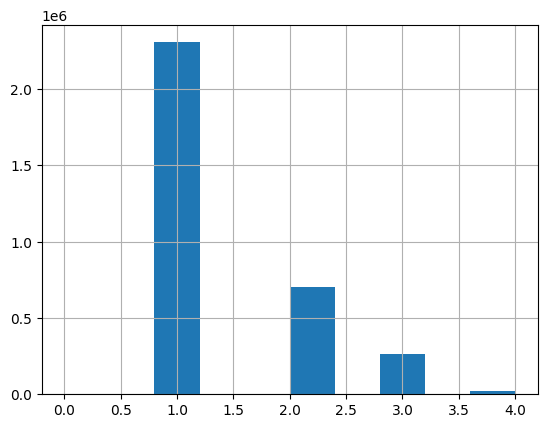

In [84]:
dataframe['num_products'].hist()

<AxesSubplot: >

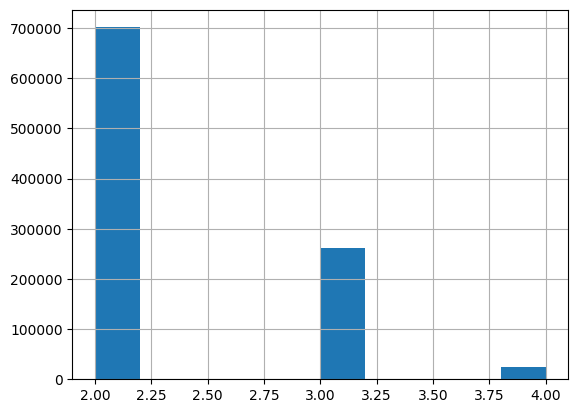

In [85]:
dataframe[dataframe['num_products'] > 1]['num_products'].hist()

# Understanding the xbuy journey


## Single product users

469968


<BarContainer object of 4 artists>

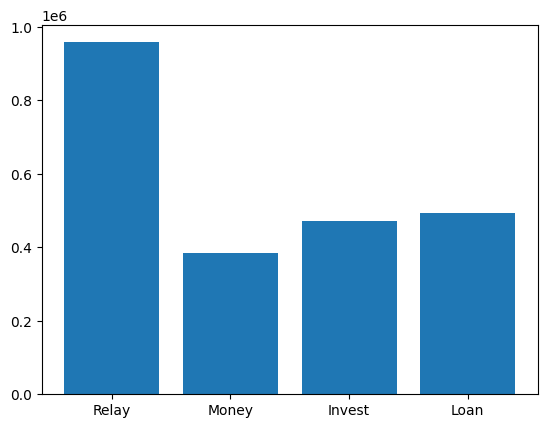

In [86]:
#get the number of people who only have one product and use relay
just_relay = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_relay'] == True)]['num_products'].count()
just_money = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_money'] == True)]['num_products'].count()
just_invest = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_invest'] == True)]['num_products'].count()
just_loan = dataframe[(dataframe['num_products'] == 1) & (dataframe['uses_loan'] == True)]['num_products'].count()

print(just_invest)

#make a bar graph of the number of people who only have one product
plt.bar(['Relay', 'Money', 'Invest', 'Loan'], [just_relay, just_money, just_invest, just_loan])

<BarContainer object of 3 artists>

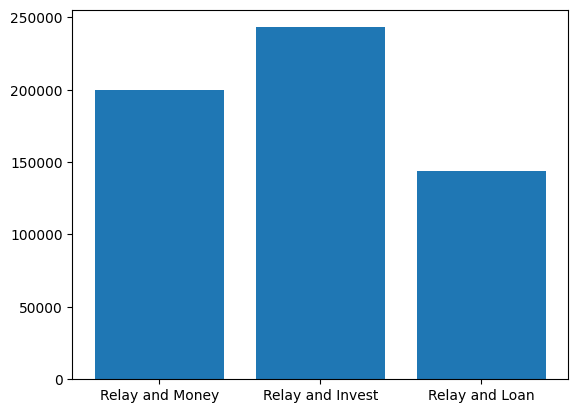

In [87]:
num_relay_money = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_money'] == True) & (dataframe['num_products'] == 2)])
num_relay_invest = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_invest'] == True) & (dataframe['num_products'] == 2)])
num_relay_loan = len(dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_loan'] == True) & (dataframe['num_products'] == 2)])

# make a bar graph of the number of people who have two products
plt.bar(['Relay and Money', 'Relay and Invest', 'Relay and Loan'], [num_relay_money, num_relay_invest, num_relay_loan])

In [88]:
relay_money = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_money'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_money'])]['num_products'].count()
relay_invest = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_invest'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_invest'])]['num_products'].count()
relay_loan = dataframe[(dataframe['uses_relay'] == True) & (dataframe['uses_loan'] == True) & (dataframe['num_products'] == 2) & (dataframe['days_with_relay'] > dataframe['days_with_loan'])]['num_products'].count()

# make a bar graph of the number of people who have two products
# plt.bar(['Relay and Money', 'Relay and Invest', 'Relay and Loan'], [relay_money, relay_invest, relay_loan])


# Sankey diagram? More like JANKEY diagram amirite?

In [89]:
def convert_tuple_to_string(tup):
    str = ''
    for item in range(len(tup)):
        str = str + tup[item]
        if item < len(tup) - 1:
            str = str + '_'
    return str
    


In [101]:
products = ['relay', 'money', 'invest', 'loan']

#permute the products
product_permutations_4 = list(itertools.permutations(products, 4))
product_permutations_3 = list(itertools.permutations(products, 3))
product_permutations_2 = list(itertools.permutations(products, 2))
product_permutations_1 = list(itertools.permutations(products, 1))

product_permutations = product_permutations_4 + product_permutations_3 + product_permutations_2 + product_permutations_1

#create a dataframe that will have 5 columns: lvl1, lvl2, lvl3, lvl4, and count
product_permutations_df = pd.DataFrame(columns=['lvl1', 'lvl2', 'lvl3', 'lvl4', 'count'])
#fill the dataframe with the product permutations
for i in range(len(product_permutations)):
    for j in range(len(product_permutations[i])):
        product_permutations_df.loc[i, f'lvl{j+1}'] = convert_tuple_to_string(product_permutations[i][:j+1])

product_permutations_df['count'] = 0

product_permutations_df

,lvl1,lvl2,lvl3,lvl4,count
0,relay,relay_money,relay_money_invest,relay_money_invest_loan,0
1,relay,relay_money,relay_money_loan,relay_money_loan_invest,0
2,relay,relay_invest,relay_invest_money,relay_invest_money_loan,0
3,relay,relay_invest,relay_invest_loan,relay_invest_loan_money,0
4,relay,relay_loan,relay_loan_money,relay_loan_money_invest,0
...,...,...,...,...,...
59,loan,loan_invest,NaN,NaN,0
60,relay,NaN,NaN,NaN,0
61,money,NaN,NaN,NaN,0
62,invest,NaN,NaN,NaN,0


In [102]:
#last populated column is the value held in the last column that has a value in it, with the options being lvl1, lvl2, lvl3, and lvl4
product_permutations_df['last_populated_column'] = product_permutations_df['lvl4'].fillna(product_permutations_df['lvl3'].fillna(product_permutations_df['lvl2'].fillna(product_permutations_df['lvl1'])))
last_populated_columns_dict = product_permutations_df.set_index('last_populated_column')['count'].to_dict()

In [103]:
last_populated_columns_dict

{'relay_money_invest_loan': 0,
 'relay_money_loan_invest': 0,
 'relay_invest_money_loan': 0,
 'relay_invest_loan_money': 0,
 'relay_loan_money_invest': 0,
 'relay_loan_invest_money': 0,
 'money_relay_invest_loan': 0,
 'money_relay_loan_invest': 0,
 'money_invest_relay_loan': 0,
 'money_invest_loan_relay': 0,
 'money_loan_relay_invest': 0,
 'money_loan_invest_relay': 0,
 'invest_relay_money_loan': 0,
 'invest_relay_loan_money': 0,
 'invest_money_relay_loan': 0,
 'invest_money_loan_relay': 0,
 'invest_loan_relay_money': 0,
 'invest_loan_money_relay': 0,
 'loan_relay_money_invest': 0,
 'loan_relay_invest_money': 0,
 'loan_money_relay_invest': 0,
 'loan_money_invest_relay': 0,
 'loan_invest_relay_money': 0,
 'loan_invest_money_relay': 0,
 'relay_money_invest': 0,
 'relay_money_loan': 0,
 'relay_invest_money': 0,
 'relay_invest_loan': 0,
 'relay_loan_money': 0,
 'relay_loan_invest': 0,
 'money_relay_invest': 0,
 'money_relay_loan': 0,
 'money_invest_relay': 0,
 'money_invest_loan': 0,
 'mon

In [104]:
#go through the dataframe and create the product permutations for each person
# the permutation is the order in which they used the products
# for example, a user with data like this:
# days_with_relay: 100
# days_with_money: NaN
# days_with_invest: 300
# days_with_loan: NaN
# would have a permutation of 'invest_relay' because they used invest first and then relay

for i in tqdm(range(len(dataframe))):
    #create a list of the products that the user has
    products = []
    if dataframe.loc[i, 'uses_relay'] == True:
        products.append('relay')
    if dataframe.loc[i, 'uses_money'] == True:
        products.append('money')
    if dataframe.loc[i, 'uses_invest'] == True:
        products.append('invest')
    if dataframe.loc[i, 'uses_loan'] == True:
        products.append('loan')
    #sort the list of products by the number of days the user has used the product
    products.sort(key=lambda x: dataframe.loc[i, f'days_with_{x}'])
    #convert the list of products to a string
    product_permutation = convert_tuple_to_string(tuple(products))
    #increment the count of the product permutation
    if len(products) > 0: 
        last_populated_columns_dict[product_permutation] += 1


100%|██████████| 3290278/3290278 [03:18<00:00, 16606.83it/s]


In [105]:
#populate the dataframe with the counts
for i in range(len(product_permutations_df)):
    product_permutations_df.loc[i, 'count'] = last_populated_columns_dict[product_permutations_df.loc[i, 'last_populated_column']]

#drop the last_populated_column column
product_permutations_df = product_permutations_df.drop(columns=['last_populated_column'])


In [111]:
product_permutations_df['lvl0'] = 'all'
#reindex the dataframe so the columns are in the correct order
product_permutations_df = product_permutations_df.reindex(columns=['lvl0', 'lvl1', 'lvl2', 'lvl3', 'lvl4', 'count'])

In [112]:
#save product_permutations_df to a csv file
product_permutations_df.to_csv('product_permutations.csv')


In [113]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [114]:
fig = genSankey(product_permutations_df,cat_cols=['lvl0','lvl1','lvl2','lvl3','lvl4'],value_cols='count',title='xbuy visualized')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'

# Can we predict xbuy from Relay into Invest/Money/PL? 


In [23]:
# create a df where uses_relay is True and num_products > 1 and days_with_relay is the max of days_with_relay, days_with_invest, days_with_money, days_with_loan
relay_xbuy = dataframe[(dataframe['uses_relay'] == True) & (dataframe['num_products'] > 1)]
relay_xbuy = relay_xbuy[relay_xbuy['days_with_relay'] == relay_xbuy[['days_with_relay', 'days_with_invest', 'days_with_money', 'days_with_loan']].max(axis=1)]


In [ ]:
# because there are 4 products, and we are starting with relay, we want to know how many people use invest, money, and loan after using relay
# we can do this by counting the number of people who use invest, money, and loan after using relay (for those who use relay and one other product)



In [25]:
#show the number of people who use invest, money, and loan as their next product after using relay
relay_xbuy['num_products'].value_counts()

3    24890
2     5088
4      867
Name: num_products, dtype: int64